In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('diamonds_dataset.csv')

In [3]:
data.head()

,id,url,shape,price,carat,cut,color,clarity,report,type,date_fetched
0,10086429,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Very Good,J,SI2,GIA,natural,2020-11-29 12-26 PM
1,10016334,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.31,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM
2,9947216,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,VS2,GIA,natural,2020-11-29 12-26 PM
3,10083437,https://www.brilliantearth.com//loose-diamonds...,Round,400,0.30,Ideal,I,SI2,GIA,natural,2020-11-29 12-26 PM
4,9946136,https://www.brilliantearth.com//loose-diamonds...,Emerald,400,0.30,Ideal,I,SI1,GIA,natural,2020-11-29 12-26 PM


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119307 entries, 0 to 119306
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            119307 non-null  int64  
 1   url           119307 non-null  object 
 2   shape         119307 non-null  object 
 3   price         119307 non-null  int64  
 4   carat         119307 non-null  float64
 5   cut           119307 non-null  object 
 6   color         119307 non-null  object 
 7   clarity       119307 non-null  object 
 8   report        119307 non-null  object 
 9   type          119307 non-null  object 
 10  date_fetched  119307 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 10.0+ MB


In [5]:
data.describe()

,id,price,carat
count,1.193070e+05,1.193070e+05,119307.000000
mean,9.905507e+06,3.286843e+03,0.884169
std,2.373824e+05,9.114695e+03,0.671141
min,4.367730e+05,2.700000e+02,0.250000
25%,9.854352e+06,9.000000e+02,0.400000
50%,9.978096e+06,1.770000e+03,0.700000
75%,1.005433e+07,3.490000e+03,1.100000
max,1.009225e+07,1.348720e+06,15.320000


In [6]:
data.isnull().sum()

id              0
url             0
shape           0
price           0
carat           0
cut             0
color           0
clarity         0
report          0
type            0
date_fetched    0
dtype: int64

###### EDA & Data Visualization

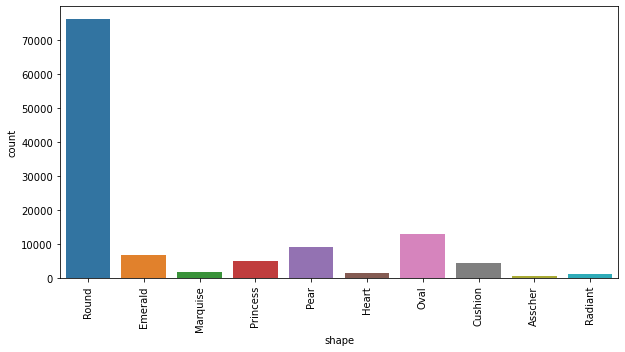

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(data['shape'])
plt.xticks(rotation=90);

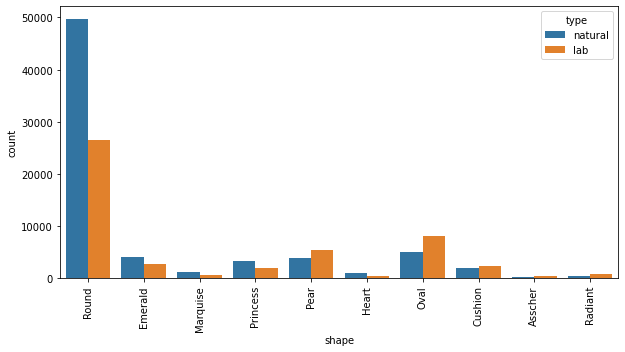

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(data['shape'],hue=data['type'])
plt.xticks(rotation=90);

(0.0, 150000.0)

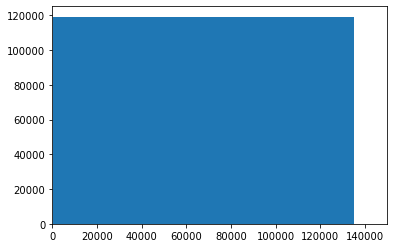

In [9]:
plt.hist(data['price']);
plt.xlim(0,150000)

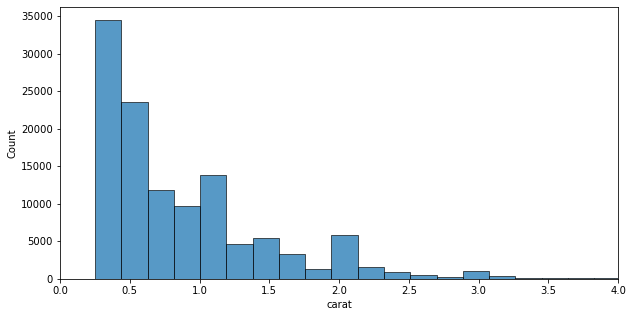

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(data['carat'],bins=80)
plt.xlim(0,4);

<AxesSubplot:xlabel='cut', ylabel='count'>

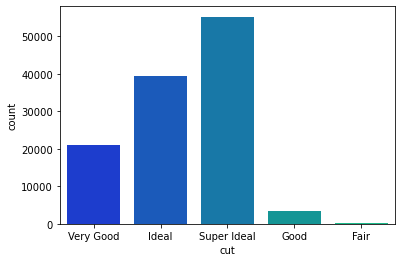

In [11]:
sns.countplot(data['cut'],palette='winter')

<AxesSubplot:xlabel='cut', ylabel='count'>

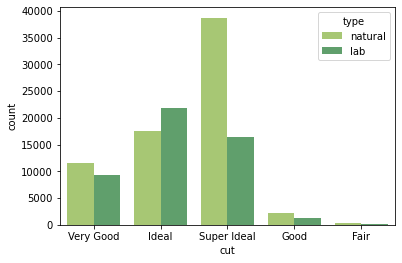

In [62]:
sns.countplot(data['cut'],palette='summer_r',hue=data['type'])

<AxesSubplot:xlabel='color', ylabel='count'>

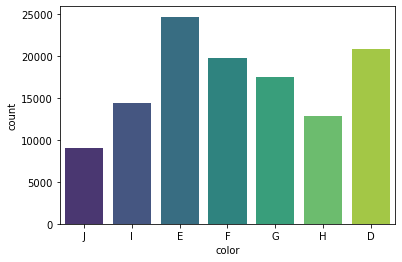

In [13]:
sns.countplot(data['color'],palette='viridis')

<AxesSubplot:xlabel='color', ylabel='count'>

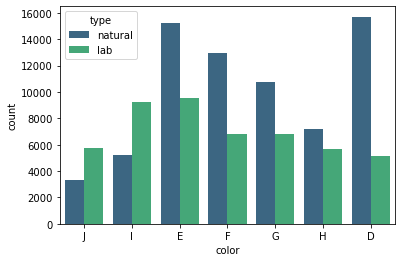

In [14]:
sns.countplot(data['color'],palette='viridis',hue=data['type'])

<AxesSubplot:xlabel='clarity', ylabel='count'>

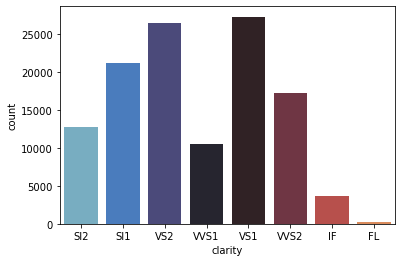

In [15]:
sns.countplot(data['clarity'],palette='icefire')

<AxesSubplot:xlabel='clarity', ylabel='count'>

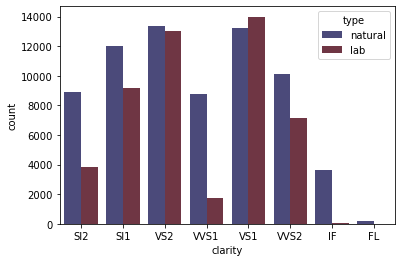

In [16]:
sns.countplot(data['clarity'],palette='icefire',hue=data['type'])

<AxesSubplot:xlabel='report', ylabel='count'>

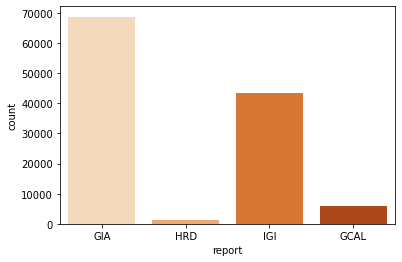

In [17]:
sns.countplot(data['report'],palette='Oranges')

<AxesSubplot:xlabel='report', ylabel='count'>

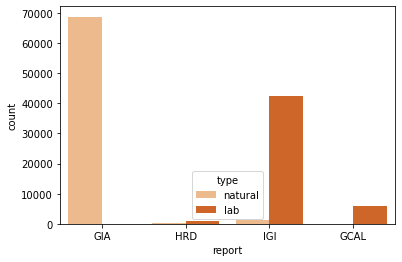

In [18]:
sns.countplot(data['report'],palette='Oranges',hue=data['type'])

<AxesSubplot:xlabel='type', ylabel='count'>

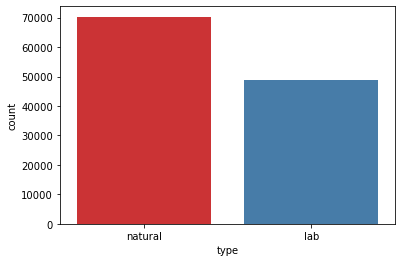

In [19]:
sns.countplot(data['type'],palette='Set1')

In [20]:
data.shape

(119307, 11)

In [21]:
X=data.drop(['id','url','date_fetched','price'],axis=1)

In [22]:
X=pd.get_dummies(X)

In [23]:
y=data['price']

###### Data Preprocessing

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.30, random_state=101)

In [26]:
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.30, random_state=101)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()

In [29]:
scaler=StandardScaler()

In [30]:
X_val=scaler.fit_transform(X_val)

In [31]:
X_test=scaler.transform(X_test)

###### Modelling

In [32]:
from sklearn.linear_model import LinearRegression,ElasticNetCV, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [33]:
linear_model=LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [34]:
elastic_model=ElasticNetCV()
elastic_model.fit(X_train,y_train)

ElasticNetCV()

In [35]:
ridge_model=Ridge()
ridge_model.fit(X_train,y_train)

Ridge()

In [50]:
rfr_model=RandomForestRegressor()
rfr_model.fit(X_train,y_train)

RandomForestRegressor()

In [37]:
gbr_model=GradientBoostingRegressor()
gbr_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [39]:
def report(model):
    preds = model.predict(X_val)
    MAE= mean_absolute_error(preds,y_val)
    MSE=mean_squared_error(preds,y_val)
    RMSE=np.sqrt(MSE)
    print('MAE:'+ str(MAE))
    print('RMSE:'+ str(RMSE))

In [40]:
print('LINEAR REGRESSION MODEL')
report(linear_model)

LINEAR REGRESSION MODEL
MAE:5.698644150264741e+16
RMSE:6.6970310253652696e+16


In [41]:
print('ELASTIC NET CV MODEL')
report(elastic_model)

ELASTIC NET CV MODEL
MAE:1905.579378490129
RMSE:10854.530923257467


In [42]:
print('RIDGE REGRESSION MODEL')
report(ridge_model)

RIDGE REGRESSION MODEL
MAE:9926.210463745334
RMSE:19727.47602051485


In [51]:
print('RANDOM FOREST REGRESSOR MODEL')
report(rfr_model)

RANDOM FOREST REGRESSOR MODEL
MAE:1720.4269906293089
RMSE:6989.7707803372905


In [44]:
print('GRADIENT BOOSTING REGRESSOR MODEL')
report(gbr_model)

GRADIENT BOOSTING REGRESSOR MODEL
MAE:1780.2085371759028
RMSE:7011.155287819971


Since Random Forest Regressor performed better than the rest so we will perform grid search on Random Forest Regressor and see if we can get better results after hyperparameter tuning.

In [45]:
from sklearn.model_selection import GridSearchCV

In [55]:
n_estimators=[50,60,70,80,90,100,110,120]
max_features=[10,11,12,13,14,15,16,17,18,19,20]
bootstrap=[True,False]

In [56]:
param_grid={'n_estimators':n_estimators,'max_features':max_features}

In [57]:
grid_model=GridSearchCV(rfr_model,param_grid)

In [58]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20],
                         'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120]})

In [65]:
grid_model.best_params_

{'max_features': 17, 'n_estimators': 60}

In [66]:
print('FINAL MODEL')
report(grid_model)

FINAL MODEL
MAE:1688.7807544624695
RMSE:7122.7038530013115


In [73]:
preds = grid_model.predict(X_test)
MAE= mean_absolute_error(preds,y_test)
MSE=mean_squared_error(preds,y_test)
RMSE=np.sqrt(MSE)
print('RANDOM FOREST REGRESSOR MODEL AFTER HYPERPARAMTER TUNING:')
print('MAE:'+ str(MAE))
print('RMSE:'+ str(RMSE))

RANDOM FOREST REGRESSOR MODEL AFTER HYPERPARAMTER TUNING:
MAE:1703.224268352158
RMSE:4186.247999412311
